# Machine Learning Example With Cars 93 Dataset

In [1]:
#All imports included here
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import os
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
os.chdir('/Users/rahulbanerjee/Rahul/ETL_HIVE/SQL')

In [2]:
import pandas as pd
card_93_df = pd.read_csv('Cars93.csv')

In [4]:
card_93_df.describe()

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


# Starting with EDA 


In [108]:
#Pandas Profiling
pf = ProfileReport(card_93_df)


In [7]:
pf.to_widgets()

In [4]:
#Finding Correlation b/w features for feature selection
card_93_df.corr()

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
id,1.000000,-0.144463,-0.137277,-0.126567,0.161808,0.137317,-0.338286,-0.233012,0.167772,0.226389,-0.179034,-0.142252,-0.277911,-0.244888,-0.293592,-0.275867,-0.126972,-0.171177,-0.220525
Min.Price,-0.144463,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,-0.137277,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,-0.126567,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,0.161808,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,0.137317,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,-0.338286,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,-0.233012,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,0.167772,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,0.226389,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264


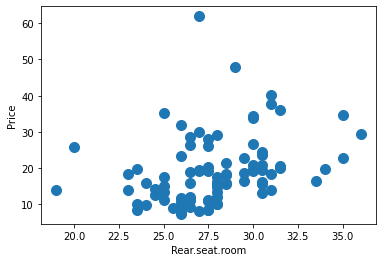

In [109]:
#Look at the scatter plot for linear properties
#Observations
# Min.price has high collinearity with other features (must be excluded)
# MPG.city and Price does not have any linearity (-ve collinarity)
# MPG.highway and Price does not have any linearity (-ve collinarity)
# RPM and Price does not have any linearity (-ve collinarity)
# Rev.per.mile and Price does not have any linearity (-ve collinarity)
# Passengers and Price does not have any linearity (low collinarity)
# Width and Price does not have any linearity (low collinarity)
# Turn.circle and Price does not have any linearity (low collinarity)
# Rear.seat.room and Price does not have any linearity (low collinarity)
# Luggage.room and Price does not have any linearity (low collinarity)

card_93_df.plot.scatter(x = 'Rear.seat.room', y = 'Price', s = 100); 

In [10]:
#Applying OLS for looking at P Values
#lm = smf.ols(formula='Price ~ Horsepower+RPM+Passengers+Width',data=card_93_df).fit()
#lm.summary()

# Define X and Y as the feature and label

In [20]:
y= card_93_df['Price']

In [110]:
x= card_93_df.drop(['Price','id','Min.Price'],axis=1)


In [111]:
y

0     15.9
1     33.9
2     29.1
3     37.7
4     30.0
      ... 
88    19.7
89    20.0
90    23.3
91    22.7
92    26.7
Name: Price, Length: 93, dtype: float64

# Pre-processing¶

In [7]:
#Find missing values and remove the same
#x.isna().sum()
for i in x.columns:
    if x[i].dtypes=='object':
        x[i]=x[i].fillna(x[i].mode()[0])
    else:
        x[i]=x[i].fillna(x[i].median())

In [8]:
#Segregating categorical & numerical/continouus
cat=x.select_dtypes(include='object')
con=x.select_dtypes(exclude='object')

In [58]:
cat

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver only,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,None,Front,5,Yes,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,None,Front,4,Yes,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,None,Front,6,Yes,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,Driver only,Rear,4,Yes,non-USA,Volvo 240


In [59]:
con

,Max.Price,EngineSize,Horsepower,Fuel.tank.capacity,Length,Wheelbase,Weight
0,18.8,1.8,140,13.2,177,102,2705
1,38.7,3.2,200,18.0,195,115,3560
2,32.3,2.8,172,16.9,180,102,3375
3,44.6,2.8,172,21.1,193,106,3405
4,36.2,3.5,208,21.1,186,109,3640
...,...,...,...,...,...,...,...
88,22.7,2.5,109,21.1,187,115,3960
89,22.4,2.0,134,18.5,180,103,2985
90,23.7,2.8,178,18.5,159,97,2810
91,23.5,2.3,114,15.8,190,104,2985


# Apply Encoding on Categorical Values

In [9]:
# We will use label enoder 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
#oh=OneHotEncoder()

In [10]:
#Apply Label Encoding on cat values
cat_labelled=cat.apply(le.fit_transform)
cat_labelled

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,0,48,3,2,1,1,1,1,0
1,0,55,2,0,1,3,1,1,1
2,1,8,0,1,1,3,1,1,3
3,1,0,2,1,1,3,1,1,2
4,2,5,2,1,2,1,1,1,4
...,...,...,...,...,...,...,...,...,...
88,30,41,5,2,1,2,1,1,88
89,30,64,0,2,1,1,1,1,90
90,30,28,4,2,1,3,1,1,87
91,31,2,0,1,2,1,1,1,91


# Applying Standard Scaling on Numerical Data¶

In [11]:
#Using Standard Scaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#mn=MinMaxScaler()
ss=StandardScaler()

In [15]:
con_scaled=pd.DataFrame(ss.fit_transform(con),columns=ss.get_feature_names_out())
con_scaled

,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.449727,-1.037572,-0.627055
1,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.740403,0.391972,0.830208
2,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.060329,0.034586,0.514894
3,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.080441,1.106743,0.566026
4,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.279708,-0.322800,0.966560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.100552,0.034586,1.511968
89,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.250459,0.034586,-0.149822
90,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.619745,0.391972,-0.448092
91,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.570385,0.034586,-0.149822


In [13]:
# Post applying scaling and labelling merge the data set
processed_df =con_scaled.join(cat_labelled)

In [16]:
processed_df

,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Weight,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,...,-0.627055,0,48,3,2,1,1,1,1,0
1,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,...,0.830208,0,55,2,0,1,3,1,1,1
2,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,...,0.514894,1,8,0,1,1,3,1,1,3
3,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,...,0.566026,1,0,2,1,1,3,1,1,2
4,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,...,0.966560,2,5,2,1,2,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,...,1.511968,30,41,5,2,1,2,1,1,88
89,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,...,-0.149822,30,64,0,2,1,1,1,1,90
90,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,...,-0.448092,30,28,4,2,1,3,1,1,87
91,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,...,-0.149822,31,2,0,1,2,1,1,1,91


In [ ]:
#Post applying standard scaling look at the graphs for distribution of data

In [57]:
pf = ProfileReport(processed_df)

In [58]:
pf.to_widgets()

In [29]:
#Looking at OLS model for Feature selection
from statsmodels.api import add_constant,OLS
ols=OLS(y,add_constant(processed_df))

In [30]:
model=ols.fit()
#Create the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.27e-51
Time:                        23:19:44   Log-Likelihood:                -147.22
No. Observations:                  93   AIC:                             346.4
Df Residuals:                      67   BIC:                             412.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.7331      0.981     18.084      0.000      15.776      19.690
Max.Price              7.9416      0.296     26.855      0.000       7.351       8.532
MPG.city              -0.5077      0.647     -0.785      0.435      -1.799       0.784
MPG.highway           -0.1938      0.619     -0.313      0.755      -1.430       1.043
EngineSize             0.8708      0.544      1.602      0.114      -0.214       1.956
Horsepower             0.1124      0.690      0.163      0.871      -1.264       1.489
RPM                    0.0776      0.354      0.219      0.827      -0.629       0.784
Rev.per.mile           0.4593      0.317      1.449      0.152      -0.173       1.092
Fuel.tank.capacity     0.0215      0.403      0.053      0.958      -0.783       0.826
Passengers            -0.6802      0.383     -1.778      0.080      -1.444       0.083
Length                 0.6111      0.418      1.462      0.148      -0.223       1.445
Wheelbase             -0.0314      0.470     -0.067      0.947      -0.970       0.907
Width                 -1.0295      0.591     -1.742      0.086      -2.209       0.150
Turn.circle           -0.1596      0.314     -0.508      0.613      -0.787       0.468
Rear.seat.room         0.7007      0.242      2.897      0.005       0.218       1.183
Luggage.room          -0.1460      0.259     -0.563      0.576      -0.664       0.372
Weight                -0.0692      0.797     -0.087      0.931      -1.660       1.521
Manufacturer           0.0466      0.204      0.229      0.820      -0.360       0.453
Model                  0.0072      0.007      1.078      0.285      -0.006       0.021
Type                  -0.0144      0.163     -0.088      0.930      -0.339       0.311
AirBags               -0.3547      0.309     -1.147      0.256      -0.972       0.263
DriveTrain             0.4456      0.412      1.081      0.284      -0.377       1.268
Cylinders              0.8503      0.315      2.699      0.009       0.221       1.479
Man.trans.avail       -0.9246      0.522     -1.771      0.081      -1.967       0.117
Origin                 0.5546      0.487      1.139      0.259      -0.417       1.527
Make                  -0.0122      0.069     -0.178      0.859      -0.149       0.125
==============================================================================
Omnibus:                        3.993   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.286
Skew:                           0.381   Prob(JB):                        0.193
Kurtosis:                       3.516   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [31]:
#Now get the P Values
model.pvalues

const                 1.776023e-27
Max.Price             1.386721e-37
MPG.city              4.353451e-01
MPG.highway           7.553128e-01
EngineSize            1.138879e-01
Horsepower            8.710320e-01
RPM                   8.271698e-01
Rev.per.mile          1.519318e-01
Fuel.tank.capacity    9.575654e-01
Passengers            7.991686e-02
Length                1.484805e-01
Wheelbase             9.469746e-01
Width                 8.605700e-02
Turn.circle           6.133436e-01
Rear.seat.room        5.078746e-03
Luggage.room          5.755738e-01
Weight                9.310258e-01
Manufacturer          8.197141e-01
Model                 2.849904e-01
Type                  9.299356e-01
AirBags               2.556427e-01
DriveTrain            2.835216e-01
Cylinders             8.794320e-03
Man.trans.avail       8.108530e-02
Origin                2.587681e-01
Make                  8.593459e-01
dtype: float64

In [32]:
model.pvalues.sort_values(ascending=True)

Max.Price             1.386721e-37
const                 1.776023e-27
Rear.seat.room        5.078746e-03
Cylinders             8.794320e-03
Passengers            7.991686e-02
Man.trans.avail       8.108530e-02
Width                 8.605700e-02
EngineSize            1.138879e-01
Length                1.484805e-01
Rev.per.mile          1.519318e-01
AirBags               2.556427e-01
Origin                2.587681e-01
DriveTrain            2.835216e-01
Model                 2.849904e-01
MPG.city              4.353451e-01
Luggage.room          5.755738e-01
Turn.circle           6.133436e-01
MPG.highway           7.553128e-01
Manufacturer          8.197141e-01
RPM                   8.271698e-01
Make                  8.593459e-01
Horsepower            8.710320e-01
Type                  9.299356e-01
Weight                9.310258e-01
Wheelbase             9.469746e-01
Fuel.tank.capacity    9.575654e-01
dtype: float64

In [44]:
#Take the first 10 values wrt to the P Value in ascending order
col=model.pvalues.sort_values(ascending=True).index
updated_col = col[0:12]

In [45]:
updated_col = updated_col.drop('const')

In [112]:
updated_col

Index(['Max.Price', 'Rear.seat.room', 'Cylinders', 'Passengers',
       'Man.trans.avail', 'Width', 'EngineSize', 'Length', 'Rev.per.mile',
       'AirBags', 'Origin'],
      dtype='object')

In [46]:
selected_df = pd.DataFrame(processed_df,columns=updated_col)

# Apply Test Train Split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(selected_df,y,test_size=0.20,random_state=20)

# Model Building

In [48]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [49]:
lm.intercept_

17.95423532245516

In [50]:
#These are the m1,m2,m3 values
lm.coef_

array([ 8.06876704,  0.61435915,  1.09646466, -0.70936616, -0.64104665,
       -1.00520886,  0.68471417,  0.6990503 ,  0.30253074, -0.36153054,
        0.52345729])

In [51]:
lm.score(x_test,y_test)

0.9812518137364472

# Evaluation Of Model¶

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

In [53]:
#Predicted Value for x_train
y_pred_train=lm.predict(x_train)


In [105]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [107]:
#Finding the Error and Confidence for train data (y-y^)
mse=mean_squared_error(y_train,y_pred_train)
mae=mean_absolute_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)
rmse=np.sqrt(mse)
#adj_r2_val = adj_r2(y_train,y_pred_train)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)
#print('Adjusted R2 val', adj_r2)

MSE: 1.6651698202946752
RMSE: 1.2904145924061288
MAE: 0.9823806608303794
R2 score: 0.9824032078469589


In [106]:
#Same thing but rounding off
mse=round(mean_squared_error(y_train,y_pred_train),2)
mae=round(mean_absolute_error(y_train,y_pred_train),2)
r2=round(r2_score(y_train,y_pred_train),2)
rmse=round(np.sqrt(mse),2)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)


MSE: 1.76
RMSE: 1.33
MAE: 1.03
R2 score: 0.98


In [55]:
#Testing Data Evaluation
y_pred_test=lm.predict(x_test)
y_pred_test       #predicted

array([17.64274651, 11.02168327, 29.04732901, 11.24509284, 10.33111796,
       44.86013721, 10.30470838, 22.94304531, 15.54898392, 25.81759269,
       20.92815706, 19.66015331, 18.21705722, 19.59904538, 14.92830229,
        9.74624306, 12.11543518, 18.01651487, 10.49802604])

In [92]:
y_test  #actual value

77    28.7
63    11.8
26    15.6
29    19.3
43     8.0
57    31.9
35    19.9
44    10.0
22     9.2
90    23.3
5     15.7
32    11.3
11    13.4
56    32.5
Name: Price, dtype: float64

In [56]:
#Finding the same error and confidence for test data
mse1=round(mean_squared_error(y_test,y_pred_test),2)
mae1=round(mean_absolute_error(y_test,y_pred_test),2)
r21=round(r2_score(y_test,y_pred_test),2)
rmse1=round(np.sqrt(mse1),2)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 score:',r21)

MSE: 1.52
RMSE: 1.23
MAE: 0.84
R2 score: 0.98


# Applying L1 or Lasso Regression¶

In [60]:
from sklearn.linear_model import Lasso,Ridge

In [102]:
#Finding the best alpha with Cross Validation (CV)
lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(x_train,y_train)

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=50, max_iter=200000, normalize=True)

In [87]:
la=Lasso(alpha=lassocv.alpha_)


In [90]:
la.fit(x_train,y_train)

Lasso(alpha=0.0011089313653627017)

In [91]:
#Predict for Train Data
y_pred_train_l1=la.predict(x_train)
y_pred_train_l1

array([ 8.95053107, 21.46088932, 31.44866344, 20.91579379, 16.35333936,
        9.96121023, 28.68099645, 34.47853712, 25.34533547, 16.20447933,
       18.62745507, 12.003862  , 10.65725489, 11.60044888, 19.67637331,
       14.43485158, 24.00023497, 12.72588031, 26.83656942, 30.5760075 ,
       13.78755737, 21.91070877,  8.669124  , 31.61984189, 18.41556292,
        7.0218047 , 19.77364136, 34.47513794, 17.2831295 , 19.29968346,
       15.63870349, 12.96291226, 15.40215102, 13.25969225, 10.352651  ,
       20.55573963, 16.76191344, 15.07677689, 10.62321994, 25.44755668,
       20.80489349, 22.03825668,  7.90347292,  8.96860281, 31.31207913,
       20.392984  ,  9.50252837, 37.83779017, 30.18345621, 39.18108986,
       10.66313158, 27.87050527, 10.70458495, 38.01250567, 20.03945702,
       64.95195049, 16.41170003,  9.38862052, 20.52599904, 23.68244418,
       19.17077881, 27.57304227, 16.2588191 , 15.06564789, 18.87829581,
       12.06697461, 14.0280838 ,  9.42495397, 19.94915894, 15.87

In [92]:
#Finding the same error and confidence for train data . This is for L1 Data
mse=mean_squared_error(y_train,y_pred_train_l1)
mae=mean_absolute_error(y_train,y_pred_train_l1)
r2=r2_score(y_train,y_pred_train_l1)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)

MSE: 1.66523294523494
RMSE: 1.290439051344518
MAE: 0.9814155532597345
R2 score: 0.9824025407699797


In [93]:
#Predict for Test Data
y_pred_test_l1=la.predict(x_test)
y_pred_test_l1

array([17.64847546, 11.02112107, 29.03698182, 11.22800348, 10.3280263 ,
       44.84206021, 10.30403125, 22.94021953, 15.55222367, 25.81075401,
       20.93013761, 19.66273553, 18.22427589, 19.60551691, 14.92537168,
        9.7364708 , 12.11749892, 18.02521237, 10.48175622])

In [94]:
#Finding the same error and confidence for test data . This is for L1 Data
mse=mean_squared_error(y_test,y_pred_test_l1)
mae=mean_absolute_error(y_test,y_pred_test_l1)
r2=r2_score(y_test,y_pred_test_l1)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)

MSE: 1.526501264324881
RMSE: 1.2355165981583902
MAE: 0.8422817351270926
R2 score: 0.9812158976543762


In [67]:
#Conclusion RMSE and R2 score is same in this case .

# Applying L2 or Lasso Regression

In [103]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10 , normalize=True)
ridgecv.fit(x_train,y_train)

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/rahulbanerjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

RidgeCV(alphas=array([3.04693385, 7.87906385, 9.24823381, 9.55990238, 6.30342031,
       1.29123922, 3.26146216, 7.73701096, 6.96584392, 1.29466921,
       4.55763939, 1.15098966, 1.34726648, 0.69946405, 6.35042676,
       9.46665019, 6.43165914, 0.62865765, 4.67578809, 1.28971428,
       0.94436686, 9.56356191, 2.25345472, 5.71643344, 6.07728134,
       8.17828555, 6.74527261, 3.26519838, 1.13539478, 3.66030711,
       6.86222995, 8.70671357, 8.24722885, 4.03308931, 1.58720712,
       6.39990281, 9.63085745, 2.36347892, 5.61334144, 6.33481812,
       6.64030014, 7.09236629, 2.40091864, 1.93316945, 5.76232368,
       3.85754816, 9.82158585, 4.78013996, 1.13625473, 2.17241277]),
        cv=10, normalize=True)

In [104]:
ra=Ridge(alpha=ridgecv.alpha_)
ra.fit(x_train,y_train)

Ridge(alpha=0.6286576522595078)

In [97]:
#Predict for Train Data
y_pred_train_l2=ra.predict(x_train)
y_pred_train_l2

array([ 8.96141274, 21.46363447, 31.45153358, 20.90307819, 16.3546983 ,
        9.9487791 , 28.68723656, 34.4842413 , 25.34701627, 16.20252755,
       18.63746067, 12.01456007, 10.65360125, 11.59864742, 19.67127284,
       14.43420083, 24.00154646, 12.72678784, 26.82264573, 30.5764872 ,
       13.7774312 , 21.89693755,  8.66570247, 31.62935374, 18.4136344 ,
        7.02405973, 19.78561343, 34.47592672, 17.27344924, 19.30713841,
       15.6443523 , 12.96308032, 15.39354937, 13.26328363, 10.36404315,
       20.56546778, 16.76396712, 15.07091035, 10.61151049, 25.43851655,
       20.80449341, 22.05769287,  7.91277614,  8.98143337, 31.30787318,
       20.40535943,  9.50764739, 37.83344747, 30.17939288, 39.19172173,
       10.66134957, 27.85998906, 10.69837367, 38.00804792, 20.03376623,
       64.93211686, 16.41308888,  9.39970137, 20.525117  , 23.68795222,
       19.16915821, 27.58584311, 16.2471269 , 15.0704105 , 18.88220499,
       12.05298509, 14.01194924,  9.42949451, 19.94181868, 15.88

In [98]:
#Finding the same error and confidence for train data . This is for L2 Data
mse=mean_squared_error(y_train,y_pred_train_l2)
mae=mean_absolute_error(y_train,y_pred_train_l2)
r2=r2_score(y_train,y_pred_train_l2)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)

MSE: 1.6651827218557416
RMSE: 1.2904195913948848
MAE: 0.9827360373795183
R2 score: 0.9824030715088594


In [99]:
#Predict for Test Data
y_pred_test_l2=ra.predict(x_test)
y_pred_test_l2

array([17.64344024, 11.02211548, 29.04631158, 11.24821088, 10.33358452,
       44.85247985, 10.30837256, 22.94141067, 15.54861864, 25.81899277,
       20.92904628, 19.65753748, 18.21695395, 19.60036283, 14.9274598 ,
        9.7482873 , 12.11762768, 18.01713502, 10.50333973])

In [100]:
#Finding the same error and confidence for test data . This is for L2 Data
mse=mean_squared_error(y_test,y_pred_test_l2)
mae=mean_absolute_error(y_test,y_pred_test_l2)
r2=r2_score(y_test,y_pred_test_l2)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)

MSE: 1.5257804090718288
RMSE: 1.2352248415053142
MAE: 0.8453540449695964
R2 score: 0.9812247680164036


# Elastic Net Regularisation

In [101]:
#Finding the best alpha with Cross Validation (CV)
elastic= ElasticNetCV(alphas=None, cv = 10 )
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [80]:
elastic_net = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)
elastic_net.fit(x_train,y_train)

ElasticNet(alpha=0.06428773164317465)

In [81]:
#Predict for Train Data
y_pred_train_en=elastic_net.predict(x_train)
y_pred_train_en

array([ 8.7794769 , 21.81597519, 31.13472732, 21.4130829 , 16.47983135,
       10.26405555, 28.13291045, 34.20024993, 25.3701969 , 16.069551  ,
       18.90180187, 12.15341574, 10.90486304, 11.7766918 , 20.29815135,
       14.5893796 , 23.87802092, 12.98484552, 26.9065584 , 30.02191624,
       14.02668508, 22.11535428,  8.96548605, 31.39580122, 18.62938494,
        7.12561507, 19.70743444, 34.11954536, 17.36452435, 19.2885625 ,
       15.71099286, 13.23897406, 15.26807255, 12.94662096, 10.50314847,
       20.74520905, 16.90925829, 15.0154423 , 11.10936651, 25.65916108,
       20.70029174, 21.74925049,  7.76077137,  8.99287625, 31.13939376,
       20.67871036,  9.50913097, 37.46398947, 29.61298107, 38.52412829,
       10.84021084, 27.53272351, 10.9884821 , 37.47487487, 20.24961661,
       63.08003144, 17.09987237,  9.20699204, 20.68456729, 23.80481723,
       19.17411422, 27.09840956, 16.8193532 , 14.93838112, 19.06247726,
       12.52001393, 14.1195559 ,  9.48190226, 20.1580935 , 15.84

In [82]:
#Finding the same error and confidence for train data . This is for Elastic Net Data
mse=mean_squared_error(y_train,y_pred_train_en)
mae=mean_absolute_error(y_train,y_pred_train_en)
r2=r2_score(y_train,y_pred_train_en)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)

MSE: 1.8044668938459147
RMSE: 1.3433044680361614
MAE: 1.0114252021359063
R2 score: 0.9809311768138873


In [83]:
#Predict for Test Data
y_pred_test_en=elastic_net.predict(x_test)
y_pred_test_en

array([17.8702947 , 11.07339445, 28.6927329 , 11.09295939, 10.46594872,
       43.75642193, 10.60716961, 22.77405723, 15.57932727, 25.74025876,
       21.06748613, 19.46834379, 18.36869861, 19.8019673 , 14.8265916 ,
        9.71098854, 12.3603331 , 18.24446768, 10.55764595])

In [84]:
#Finding the same error and confidence for test data . This is for Elastic Net Data
mse=mean_squared_error(y_test,y_pred_test_en)
mae=mean_absolute_error(y_test,y_pred_test_en)
r2=r2_score(y_test,y_pred_test_en)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2 score:',r2)

MSE: 1.8934341243141137
RMSE: 1.3760211205915822
MAE: 0.9048747591644991
R2 score: 0.976700667593916
